# Project IART Class - COVID-19 mobility records 
## Machine Learning Analysis - Regression problems
### Explore data, create models and evaluate

In [92]:
#Main imports
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sb
import sys
import os

### Explore the data
Let's start by creating some directory variables:

In [19]:
code_path=os.getcwd()
data_path=code_path.replace('code','data')

/home/fatimab/IART_classes/COVID-19/code
/home/fatimab/IART_classes/COVID-19/data


Now let's read data.csv from the data_path:

In [21]:
os.chdir(data_path)
covid_data=pd.read_csv("data.csv",na_values=["NA"])
os.chdir(code_path)
covid_data.head()

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0


Print out summary statistics about the data set:

In [22]:
covid_data.describe()

,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,-8.229424,-13.394035,9.545845,-26.205257,-28.370122,-19.126192,10699.773562,566.007344
std,21.313369,32.891636,10.545377,30.992728,30.211025,25.983021,31656.464952,2008.520488
min,-84.798000,-91.456000,-3.647000,-95.158000,-88.956000,-79.293000,0.000000,0.000000
25%,-16.578000,-32.841000,0.744000,-49.975000,-54.145000,-40.582000,27.000000,0.000000
50%,0.088000,-6.498000,5.912000,-14.427000,-19.502000,-8.395000,648.000000,6.000000
75%,4.838000,6.961000,16.695000,-0.632000,-0.970000,1.037000,4585.000000,79.000000
max,59.474000,75.002000,40.343000,19.699000,16.822000,21.347000,336912.000000,15887.000000


Here's some important data about the dataset provided by https://www.kaggle.com/gustavomodelli/covid-community-measures:


 * Description of community measures: (% Change)

 * Retail & recreation: Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.

 * Grocery & pharmacy: Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.

 * Parks: Mobility trends for places like national parks, public beaches, marinas, dog parks, plazas, and public gardens.

 * Transit stations: Mobility trends for places like public transport hubs such as subway, bus, and train stations.

 * Workplaces: Mobility trends for places of work.

 * Residential: Mobility trends for places of residence.

Let's also see how many samples the dataset has:

In [24]:
print(covid_data.shape)

(817, 11)


This means we have 817 rows - samples - and 11 columns - features. For a simpler analysis, lets transform the date column. Date column goes from 23-02-2020 to 05-04-2020 for each country, so let's make it from day 0 to day 42. If there's a total of 43 days per country, then we have a total of 19 countries, but let's confirm that:

In [31]:
countries_column=np.array(covid_data.loc[:,"country"])
countries=np.unique(countries_column)
print("Countries: " , countries)
print("Number of countries: ", countries.shape[0])

Countries:  ['Argentina' 'Australia' 'Brazil' 'Canada' 'France' 'Germany' 'India'
 'Indonesia' 'Italy' 'Japan' 'Mexico' 'Saudi Arabia' 'South Africa'
 'South Korea' 'Spain' 'Sweden' 'Turkey' 'US' 'United Kingdom']
Number of countries:  19


In [45]:
#date_column=np.array(covid_data.loc[:,"date"])
days=np.arange(43)
days_column=np.tile(days,countries.shape[0])
covid_data.loc[:,"date"]=days_column
covid_data.head(10)

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,0,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,1,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,3,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,4,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0
5,AR,Argentina,5,2.075,-7.859,-0.577,2.877,7.973,12.857,0,0
6,AR,Argentina,6,4.685,-7.582,1.409,5.265,5.595,2.156,0,0
7,AR,Argentina,7,2.873,-10.518,2.417,-2.509,0.944,-2.360,0,0
8,AR,Argentina,8,3.958,-8.264,-1.363,0.537,6.931,16.164,0,0
9,AR,Argentina,9,5.090,-6.241,-1.330,0.200,8.202,16.192,1,0


Notice that we don't need to columns for country as we have ISO and COUNTRY, so let's delete the ISO column. 


In [51]:
del covid_data["iso"]
covid_data.head()

,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,Argentina,0,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,Argentina,1,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,Argentina,2,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,Argentina,3,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,Argentina,4,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0


So now let's look at some conjugations of the data, being aware of the country:

''

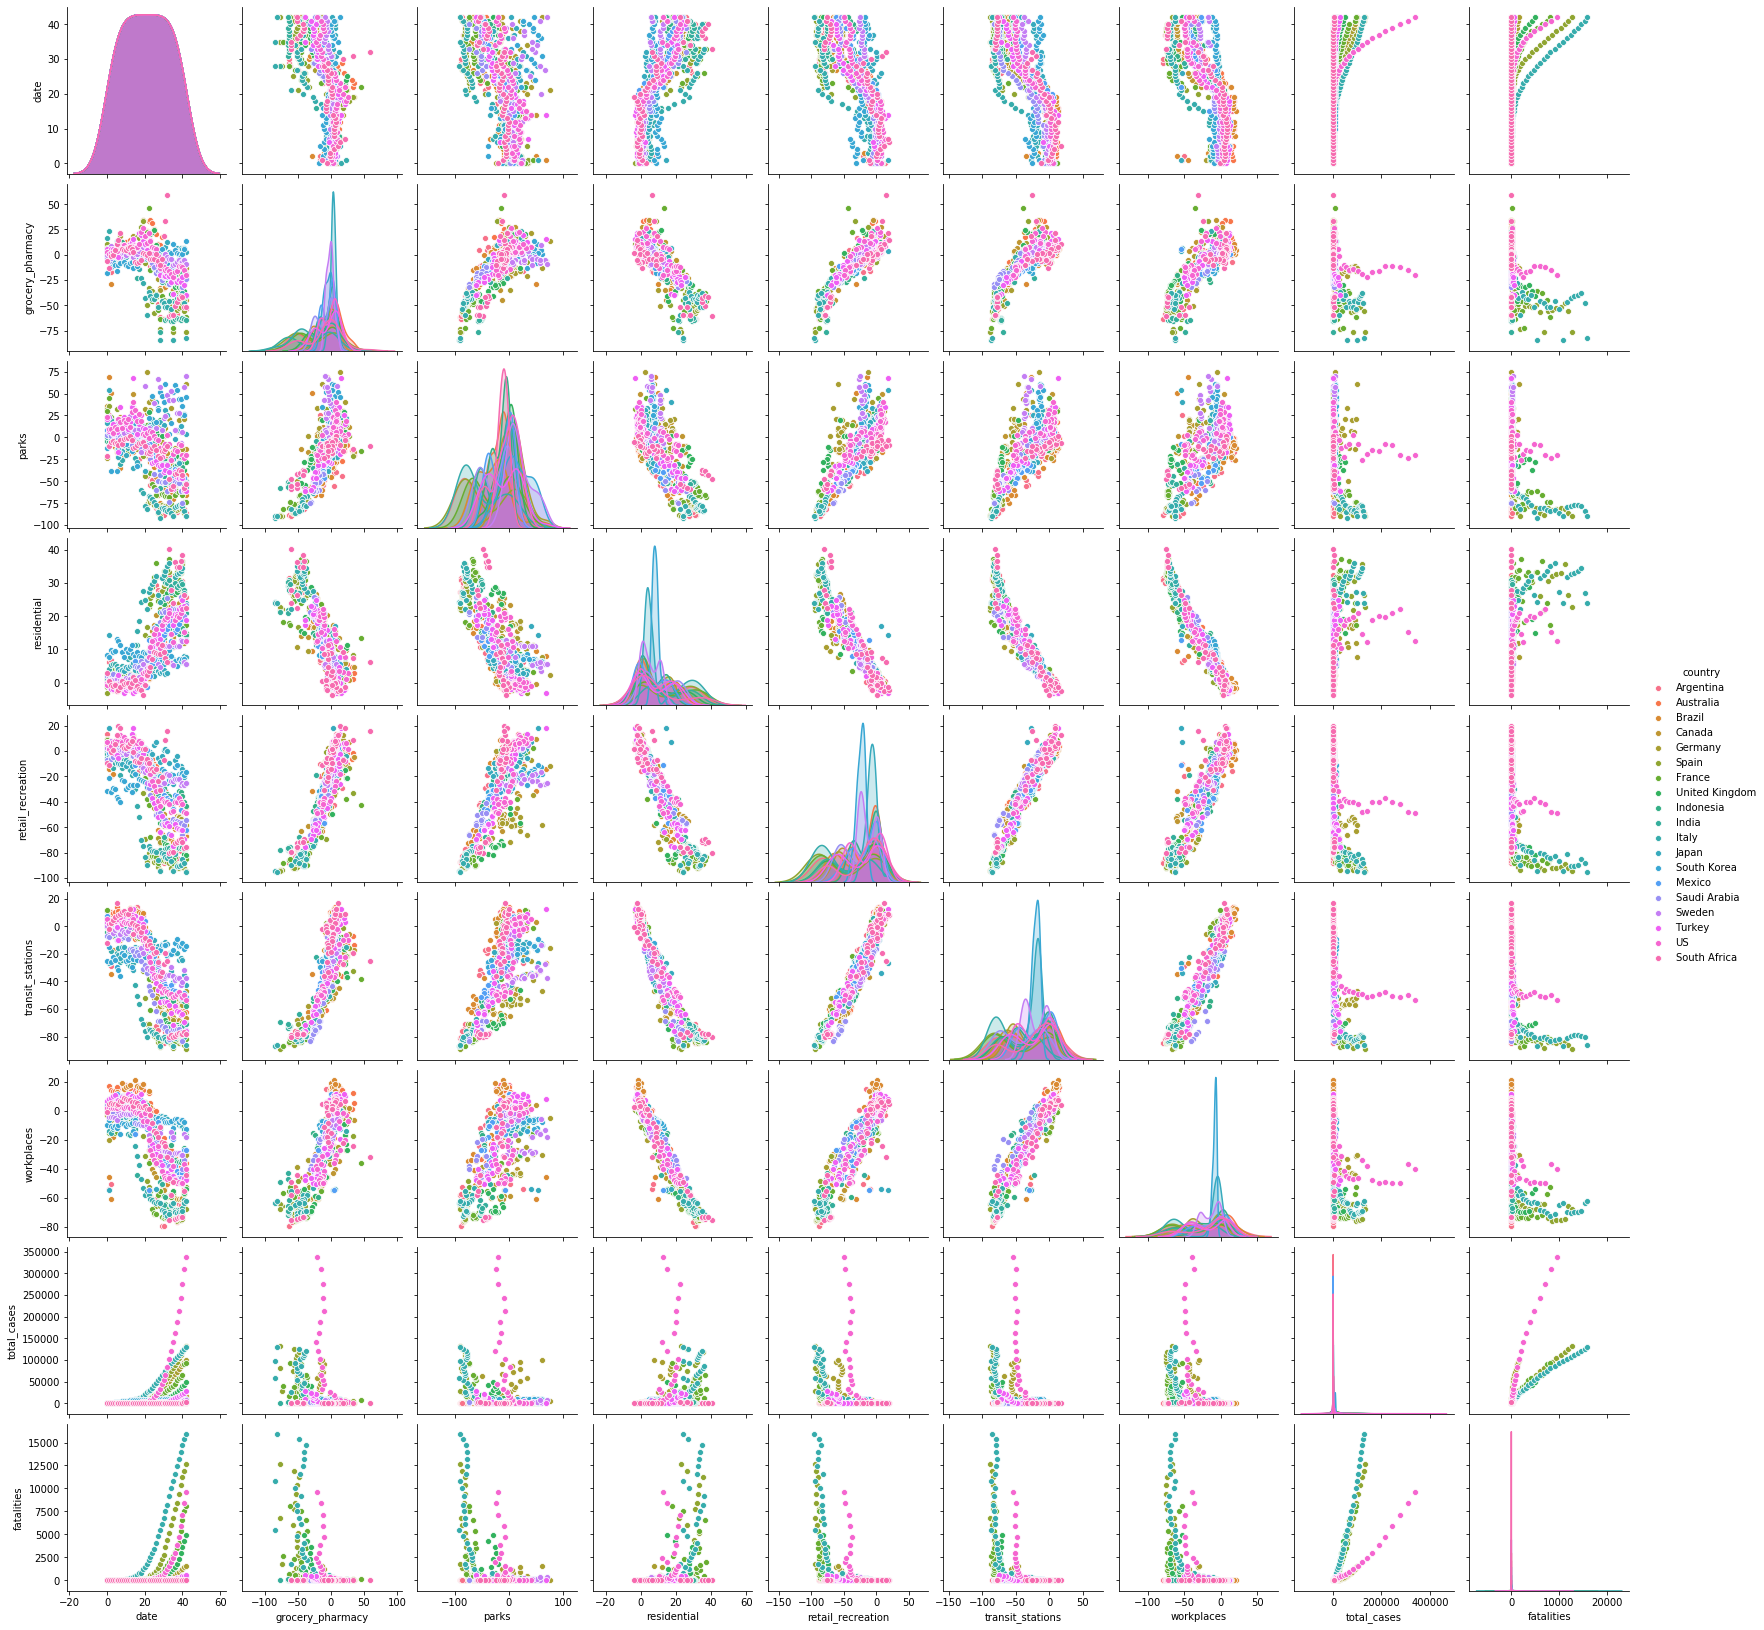

In [52]:
sb.pairplot(covid_data.dropna(),hue="country")
;

We can already see that some data correlates in a linear way, for instance, retail_recreation & transit_stations. Also, the total_cases and fatalities relates in an exponential way with the date.

At a first sight, no outliers are obvious, that can be derived from the fact that the number of samples is high. 

## Divide the data
It is important that we don't use the same countries for training and testing the data, since we samples of the same countries would create bias entries for testing. 

### First regression problem: predict total_cases
For implementing a cross validation method that considers the country separation, we will be using sklearn.model_selection methods:

In [66]:
all_inputs=covid_data[['date','grocery_pharmacy','parks','residential','retail_recreation','transit_stations','workplaces']].values
all_labels=covid_data['total_cases'].values
all_groups=np.array(covid_data.loc[:,"country"])

It is important to normalize our data

In [ ]:
##NORMALIZE DATA HERE







In [79]:
from sklearn.model_selection import GroupKFold

#Define some variables
n_splits=5

group_kfold=GroupKFold(n_splits=n_splits)
print("Splits", group_kfold.get_n_splits(all_inputs,all_labels,all_groups))
print(group_kfold)

Splits 5
GroupKFold(n_splits=5)


Example for K-Fold Split taking groups in considerations!

In [80]:
counter=1
for train_idx,test_idx in group_kfold.split(all_inputs,all_labels,all_groups):
    print("SPLIT : ", counter)
    #print("TRAIN :", train_idx, "    TEST : ", test_idx)
    print("TRAIN SPLIT: ")
    print(np.unique(np.array(covid_data.loc[train_idx]["country"])))
    print("TEST SPLIT: ")
    print(np.unique(np.array(covid_data.loc[test_idx]["country"])))
    print("\n")
    counter+=1

SPLIT :  1
TRAIN SPLIT: 
['Argentina' 'Australia' 'Brazil' 'Canada' 'Germany' 'India' 'Indonesia'
 'Italy' 'Japan' 'Mexico' 'Saudi Arabia' 'South Africa' 'South Korea'
 'Sweden' 'Turkey']
TEST SPLIT: 
['France' 'Spain' 'US' 'United Kingdom']


SPLIT :  2
TRAIN SPLIT: 
['Argentina' 'Australia' 'Brazil' 'Canada' 'France' 'India' 'Indonesia'
 'Japan' 'Saudi Arabia' 'South Africa' 'South Korea' 'Spain' 'Turkey' 'US'
 'United Kingdom']
TEST SPLIT: 
['Germany' 'Italy' 'Mexico' 'Sweden']


SPLIT :  3
TRAIN SPLIT: 
['Argentina' 'Brazil' 'Canada' 'France' 'Germany' 'Indonesia' 'Italy'
 'Japan' 'Mexico' 'South Africa' 'South Korea' 'Spain' 'Sweden' 'US'
 'United Kingdom']
TEST SPLIT: 
['Australia' 'India' 'Saudi Arabia' 'Turkey']


SPLIT :  4
TRAIN SPLIT: 
['Australia' 'Canada' 'France' 'Germany' 'India' 'Italy' 'Japan' 'Mexico'
 'Saudi Arabia' 'South Korea' 'Spain' 'Sweden' 'Turkey' 'US'
 'United Kingdom']
TEST SPLIT: 
['Argentina' 'Brazil' 'Indonesia' 'South Africa']


SPLIT :  5
TRAIN SPLIT: 

In [88]:
#Go inside the loop for each fold
for train_idx,test_idx in group_kfold.split(all_inputs,all_labels,all_groups):
    X_train=all_inputs[train_idx]
    y_train=all_labels[train_idx]
    
    X_test=all_inputs[test_idx]
    y_test=all_labels[test_idx]
       

''

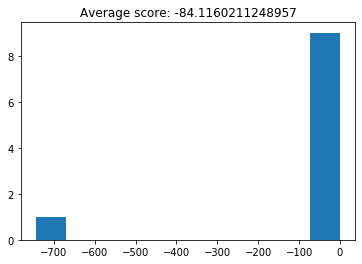

In [95]:
from sklearn.model_selection import cross_val_score
#from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#decision_tree_classifier = DecisionTreeClassifier()

from sklearn.neighbors import KNeighborsRegressor
regressor_knn=KNeighborsRegressor(n_neighbors=10)


cv_scores=cross_val_score(regressor_knn,all_inputs,all_labels,all_groups,cv=10)
plt.hist(cv_scores)
plt.title("Average score: {}".format(np.mean(cv_scores)))
;